<a href="https://colab.research.google.com/github/Parkseojin2001/DeepLearningZeroToAll/blob/main/lab_1_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 텐서(Tensor)

텐서는 배열이나 행렬과 매우 특수한 자료구조이다. Pytorch에서는 텐서를 사용하여 모델의 입력과 출력, 그리고 모델의 매개변수들을 부호화한다. 또한 GPU나 다른 하드웨어 가속기에서 실행할 수 있다.

In [4]:
import torch
import numpy as np

## 텐서(tensor) 초기화

**데이터로부터 직접 생성하기**

In [5]:
data = [[1, 2], [3, 4]]   # 데이터 자료형 자동 유추
x_data = torch.tensor(data)

**NumPy 배열로부터 생성하기**

In [7]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**다른 텐서로부터 생성하기**

명시적으로 재정의하지 않으면, 인자로 주어진 텐서의 속성(shape, datatype)을 유지

In [10]:
x_ones = torch.ones_like(x_data)  # x_data의 속성을 유지
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype = torch.float) # x_data의 속성을 덮어씀
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0370, 0.2323],
        [0.8936, 0.9010]]) 



**무작위(random) 또는 상수(constant)값 사용하기**

```shape```은 텐서의 차원을 나타내는 튜플이다.

In [12]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor}\n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1331, 0.9754, 0.0665],
        [0.8039, 0.0939, 0.5296]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 텐서의 속성(Attribute)

- Tensor shape

- Tensor datatype

In [13]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## 텐서 연산(Operation)

- 전치, 인덱싱, 슬라이싱, 수학 계산, 선형 대수, 임의 샘플링 등, 100가지 이상의 텐서 연산들을 할 수 있다.

**1D Array with PyTorch**

In [20]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [23]:
print('Rank of t: ', t.dim()) # rank
print('Shape of t: ', t.shape) # shape
print('Size of t: ', t.size()) # shape

Rank of t:  1
Shape of t:  torch.Size([7])
Size of t:  torch.Size([7])


In [22]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) # Element
print('t[2:5] t[4: -1] = ', t[2:5], t[4:-1])  #Slicing
print('t[:2] t[3:]     =', t[:2], t[3:]) # Slicing

t[0] t[1] t[-1] =  tensor(0.) tensor(1.) tensor(6.)
t[2:5] t[4: -1] =  tensor([2., 3., 4.]) tensor([4., 5.])
t[:2] t[3:]     = tensor([0., 1.]) tensor([3., 4., 5., 6.])


**2D Array with PyTorch**

In [24]:
t = torch.FloatTensor([[1., 2., 3.,],
                       [4., 5., 6.,],
                       [7., 8., 9.,],
                       [10., 11., 12.,]
                       ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [25]:
print(t.dim()) # rank
print(t.size()) # shape
print(t[:, 1])
print(t[:, 1].size())
print(t[:, : -1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


#### Broadcasting

In [26]:
# Same shape
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [27]:
# Vector + scaler
m1 = torch.FloatTensor([[1., 2.]])
m2 = torch.FloatTensor([3]) # [3] -> [[3, 3]]
print(m1 + m2)

tensor([[4., 5.]])


In [32]:
# 1 x 2 Vector + 2 x 1 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


In [31]:
print(m1.size())

torch.Size([1, 2])


#### Multiplication vs Matrix Multiplication

In [34]:
print()
print('--------------')
print('Mul vs Matmul')
print('--------------')
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape)
print('Shape of Matrix 2: ', m2.shape)
print(m1.matmul(m2))
print(m1 * m2)
print(m1.mul(m2))


--------------
Mul vs Matmul
--------------
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


#### Mean

In [36]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [37]:
# Can't use mean() on integers
t = torch.LongTensor([1, 2])
try:
  print(t.mean())
except Exception as exc:
  print(exc)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long


In [38]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [40]:
print(t.mean())
print(t.mean(dim = 0))
print(t.mean(dim = 1))
print(t.mean(dim = -1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


#### Sum

In [41]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [42]:
print(t.sum())
print(t.sum(dim = 0))
print(t.sum(dim = 1))
print(t.sum(dim = -1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


#### Max and Argmax

In [43]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [44]:
print(t.max())

tensor(4.)


In [45]:
print(t.max(dim = 0))
print('Max: ', t.max(dim = 0)[0])
print('Argmax: ', t.max(dim = 0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [46]:
print(t.max(dim = 1))
print(t.max(dim = -1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


#### View(Reshape)

In [48]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],

              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [49]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [50]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


#### Squeeze

차원이 1인 부분을 제거하여 (A x B x C) 형태로 만들어 준다.

원하는 dimension 위치를 따로 선택하면, 해당 위치의 1만 삭제가 가능하다.

In [51]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [52]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


#### Unsqueeze

지정한 dimension 자리에 size가 1인 빈 공간을 채워주면서 차원을 확장한다.

In [57]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [66]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [59]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [64]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [62]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


#### Type Casting

In [67]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [68]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [69]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [70]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


#### Stacking

새로운 차원을 따라 일련의 텐서를 쌓아
모든 텐서의 크기는 동일해야 한다.

In [80]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [72]:
print(torch.stack([x, y, z])) # 세로 방향(dim = 0)
print(torch.stack([x, y, z], dim = 1)) # 가로 방향(dim = 1)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### Concatenate

주어진 시퀀스를 연결하며 기존의 텐서와 차원이 동일하다.

In [77]:
t1 = torch.tensor([[1, 2],
                   [3, 4]])
t2 = torch.tensor([[5, 6],
                   [7, 8]])

In [87]:
print(torch.cat((t1, t2), dim = 0))
print(torch.cat((t1, t2), dim = 1))

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


#### Aggregate

In [88]:
tensor = torch.rand(3,4)
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

5.9963531494140625 <class 'float'>


#### Ones and Zeros

In [73]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [74]:
print(torch.ones_like(x))
print(torch.zeros_like(z))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([0., 0.])


#### In-place Operation

In [75]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [76]:
print(x.mul(2.))
print(x)
print(x.mul_(2.)) # 곱한 후 변수에 대입까지
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


**GPU로 실행**

기본적으로 텐서는 CPU에 생성

In [14]:
# GPU가 존재하면 텐서를 GPU로 이동
if torch.cuda.is_available():
  tensor = tensor.to("cuda")

## 데이터셋 불러오기

- ```torch.utils.data.Dataset``` : 샘플과 정답(label)을 저장

- ```torch.utils.data.DataLoader``` : ```Dataset```을 순회 가능한 객체로 감싼다.

- ```torchvision.datasets``` : 실제 비전(vision) 데이터에 대한 ```Dataset```을 포함하고 있다.



In [99]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
# root : 학습/테스트 데이터가 저장되는 경로
# train : 학습용 또는 테스트용 데이터셋 여부를 지정
# download = True : root에 데이터가 없는 경우 인터넷에서 다운로드
# transform and target_transform``` : 샘플과 정답을 각각 변경



# 공개 데이터셋에서 훈련 데이터 다운
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

# 공개 데이터셋에서 테스트 데이터를 다운
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

## 데이터셋을 순회하고 시각화하기

```Dataset``` 에 리스트(list)처럼 직접 접근(index)할 수 있습니다: ```training_data[index]```.

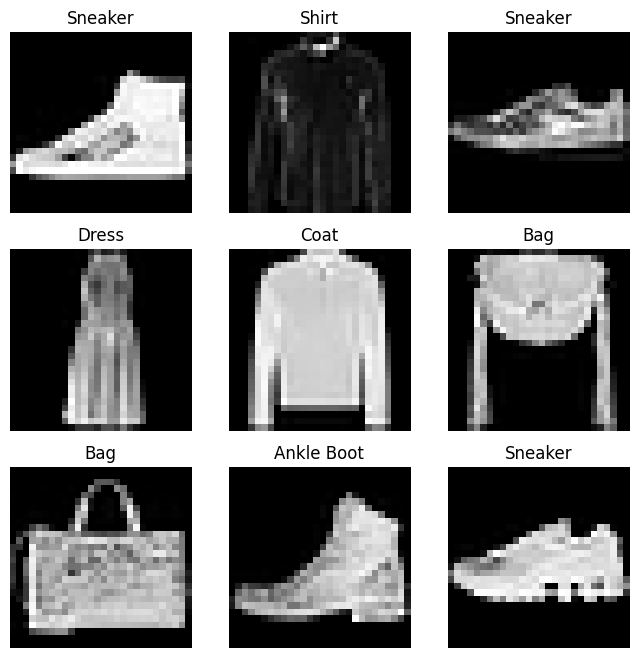

In [92]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size = (1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")

plt.show()


## 파일에서 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개의 함수를 구현해야한다.

- \_\_init\_\_

- \_\_len\_\_

- \_\_getitem\_\_

In [97]:
import os
import pandas as pd
from torchvision.io import read_image

In [100]:
class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
    # annotations_file에 정답 저장
    self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
    # img_dir 디렉토리에 저장
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

### \_\_init\_\_

\_\_init\_\_ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행된다. 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 두가지 변형(transform)을 초기화한다.

```Dataset```을 ```DataLoader```의 인자로 전달하면 데이터셋을 순회 가능한 객체로 감싸고, 자동화된 배치(batch), 샘플링(sampling), 섞기(shuffle) 및 다중 프로세스로 데이터 불러오기가 가능하다.

### \_\_len\_\_

\_\_len\_\_ 함수는 데이터셋의 샘플 개수를 반환한다.

### \_\_getitem\_\_

```Dataset```은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한다. 모델을 학습할 때, 일반적으로 샘플들을 미니배치(minibatch)로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 ```multiprocessing```을 사용하여 데이터 검색 속도를 높이려고 한다.



## DataLoader로 학습용 데이터 준비하기

In [101]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

## DataLoader를 통해 순회하기(iterate)

DataLoader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있다.

각 순회(iteration)는 (각각 batch_size=64 의 특징(feature)과 정답(label)을 포함하는) train_features 와 train_labels 의 묶음(batch)을 반환하며,  shuffle=True 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞인다.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


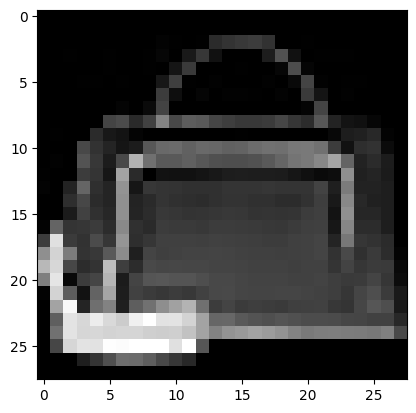

Label: 8


In [102]:
# 이미지와 정답(label)을 표시
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = "gray")
plt.show()
print(f"Label: {label}")